# PREDICTING FATALITY FROM STORM EVENTS USING A 1O-YEAR HISTORICAL STORM EVENTS DATA FROM NATIONAL OCEANING AND ATMOSPHERIC ADMINISTRATION DATABASE
#### Author: Kingsley Temidayo Fasesin

#

### Evaluating Four ML Models' (LR, RF, DT & KNN) Prediction on Strom Event Fatality 
#### Using the complete dataset with the original missing values predicted using ML model (Random Forest)

In [1]:
# import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
DataStorm_df = pd.read_csv('All_Dropped - Copy.csv')

## Desriptive Analysis

In [4]:
DataStorm_df

,Unnamed: 0,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,BEGIN_TIME,...,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE
0,0,201301,24,19791,421108,I,NaN,0,Vehicle/Towed Trailer,700,...,BRYAN,OUN,CST-6,0,0,0,1,0.0,0,ASOS
1,1,201301,27,19574,421872,D,28.0,F,Outside/Open Areas,1525,...,SALT RIVER & WYOMING RANGES,RIW,MST-7,0,0,1,0,0.0,0,Newspaper
2,2,201301,27,19575,421873,D,30.0,M,Outside/Open Areas,1700,...,TETON & GROS VENTRE MOUNTAINS,RIW,MST-7,0,0,1,0,0.0,0,Newspaper
3,3,201301,13,19577,422507,I,42.0,M,Vehicle/Towed Trailer,1100,...,FRANKLIN,PAH,CST-6,0,0,0,1,0.0,0,Trained Spotter
4,4,201301,19,19578,422671,D,60.0,M,In Water,1245,...,SEBASTIAN INLET TO JUPITER INLET 0-20NM,MLB,EST-5,0,0,1,0,0.0,0,Newspaper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,8113,202301,12,48678,1079341,I,NaN,0,Other,1627,...,NEWTON,FFC,EST-5,10,0,1,1,0.0,0,NWS Storm Survey
8114,8114,202301,12,48677,1079341,D,NaN,0,Vehicle/Towed Trailer,1627,...,NEWTON,FFC,EST-5,10,0,1,1,0.0,0,NWS Storm Survey
8115,8115,202301,12,48680,1079342,I,NaN,0,Other,1627,...,JASPER,FFC,EST-5,10,0,1,1,0.0,0,NWS Storm Survey
8116,8116,202301,12,48679,1079342,D,NaN,0,Vehicle/Towed Trailer,1627,...,JASPER,FFC,EST-5,10,0,1,1,0.0,0,NWS Storm Survey


In [35]:
#Drop unnamed columns and missing records in the dataset
DataStorm_df = DataStorm_df.drop('Unnamed: 0', axis=1)
DataStorm_df = DataStorm_df.dropna()

In [36]:
DataStorm_df

,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,BEGIN_TIME,END_DAY,...,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE
1,201301,27,19574,421872,D,28.0,F,Outside/Open Areas,1525,27,...,SALT RIVER & WYOMING RANGES,RIW,MST-7,0,0,1,0,0.0,0,Newspaper
2,201301,27,19575,421873,D,30.0,M,Outside/Open Areas,1700,27,...,TETON & GROS VENTRE MOUNTAINS,RIW,MST-7,0,0,1,0,0.0,0,Newspaper
3,201301,13,19577,422507,I,42.0,M,Vehicle/Towed Trailer,1100,13,...,FRANKLIN,PAH,CST-6,0,0,0,1,0.0,0,Trained Spotter
4,201301,19,19578,422671,D,60.0,M,In Water,1245,19,...,SEBASTIAN INLET TO JUPITER INLET 0-20NM,MLB,EST-5,0,0,1,0,0.0,0,Newspaper
5,201302,2,19579,422937,I,46.0,F,Other,200,2,...,MARSHALL,IWX,EST-5,0,0,0,1,0.0,0,CoCoRaHS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8105,202301,12,48725,1076639,D,61.0,F,Mobile/Trailer Home,1240,12,...,AUTAUGA,BMX,CST-6,16,0,7,0,0.0,0,NWS Storm Survey
8106,202301,12,48726,1076639,D,50.0,M,Mobile/Trailer Home,1240,12,...,AUTAUGA,BMX,CST-6,16,0,7,0,0.0,0,NWS Storm Survey
8107,202301,29,48567,1076699,I,20.0,F,Vehicle/Towed Trailer,400,30,...,MORGAN,SGF,CST-6,0,1,0,1,0.0,0,Public
8108,202301,9,48646,1079026,D,43.0,F,Vehicle/Towed Trailer,740,9,...,SONOMA,MTR,PST-8,0,0,1,0,0.0,0,Law Enforcement


In [37]:
# Check for missing values in dataframe
missing_values = DataStorm_df.isna().sum()
missing_values

FAT_YEARMONTH        0
FAT_DAY              0
FATALITY_ID          0
EVENT_ID             0
FATALITY_TYPE        0
FATALITY_AGE         0
FATALITY_SEX         0
FATALITY_LOCATION    0
BEGIN_TIME           0
END_DAY              0
END_TIME             0
EPISODE_ID           0
STATE                0
YEAR                 0
MONTH_NAME           0
EVENT_TYPE           0
CZ_TYPE              0
CZ_FIPS              0
CZ_NAME              0
WFO                  0
CZ_TIMEZONE          0
INJURIES_DIRECT      0
INJURIES_INDIRECT    0
DEATHS_DIRECT        0
DEATHS_INDIRECT      0
DAMAGE_PROPERTY      0
DAMAGE_CROPS         0
SOURCE               0
dtype: int64

In [38]:
DataStorm_df.describe()

,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_AGE,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS
count,5887.000000,5887.000000,5887.000000,5.887000e+03,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5.887000e+03,5.887000e+03
mean,201770.677425,16.045864,34994.278240,7.523149e+05,46.708001,1136.727875,16.768303,1458.608629,124746.780873,2017.643452,103.731102,7.032784,0.470528,4.211993,0.961440,3.738737e+11,8.727605e+05
std,286.958897,9.012560,8274.091104,1.854960e+05,22.872176,674.339968,9.039179,657.476162,30455.650864,2.868408,135.057336,34.961803,5.735367,10.261261,2.230829,8.717709e+12,1.293353e+07
min,201301.000000,1.000000,19574.000000,4.218720e+05,0.000000,0.000000,1.000000,0.000000,70133.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,201508.000000,9.000000,29368.000000,6.012140e+05,28.000000,600.000000,9.000000,1030.000000,99706.000000,2015.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
50%,201801.000000,16.000000,35320.000000,7.340190e+05,49.000000,1200.000000,17.000000,1545.000000,122352.000000,2018.000000,59.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
75%,202009.000000,24.000000,41914.500000,9.217900e+05,64.000000,1636.000000,25.000000,2000.000000,152629.000000,2020.000000,118.000000,0.000000,0.000000,3.000000,1.000000,2.000000e+04,0.000000e+00
max,202302.000000,31.000000,48748.000000,1.084141e+06,100.000000,2358.000000,31.000000,2359.000000,178227.000000,2023.000000,830.000000,468.000000,250.000000,93.000000,20.000000,2.500000e+14,5.000000e+08


## Define Variables 

#### Define Variables

In [39]:
numeric_features = [
    'FAT_YEARMONTH', 'FAT_DAY', 'FATALITY_AGE',
    'END_DAY', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS'
]


In [40]:
categorical_features = [
    'EVENT_TYPE', 'FATALITY_TYPE', 'FATALITY_SEX', 'FATALITY_LOCATION',
    'STATE', 'MONTH_NAME', 'CZ_TYPE', 'CZ_NAME', 'WFO', 'CZ_TIMEZONE',
    'SOURCE'
]

In [41]:
target_variables = [
    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
    'DEATHS_INDIRECT']

## Machine Learning Models Being Evaluated
### Linear Regression - LR, Random Forest (regression) - RF, Decision Tree - DT, K-Nearest Neighbors - KNN


#### Split Data Into Training and Testing

In [42]:
X = DataStorm_df[numeric_features + list(DataStorm_df.columns[DataStorm_df.columns.str.startswith('EVENT_TYPE_')])]
y = DataStorm_df[target_variables]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#### Initialize and fit models

In [43]:
linear_reg_model = LinearRegression()
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_reg_model = DecisionTreeRegressor(random_state=42)
knn_reg_model = KNeighborsRegressor(n_neighbors=5)

linear_reg_model.fit(X_train, y_train)
rf_reg_model.fit(X_train, y_train)
dt_reg_model.fit(X_train, y_train)
knn_reg_model.fit(X_train, y_train)

KNeighborsRegressor()

#### Predict and Evaluate Models

In [44]:
# Predict on the test set
linear_reg_predictions = linear_reg_model.predict(X_test)
rf_reg_predictions = rf_reg_model.predict(X_test)
dt_reg_predictions = dt_reg_model.predict(X_test)
knn_reg_predictions = knn_reg_model.predict(X_test)

In [45]:
# Evaluate the models
models = {
    "Linear Regression": linear_reg_predictions,
    "Random Forest Regression": rf_reg_predictions,
    "Decision Tree Regression": dt_reg_predictions,
    "K-Nearest Neighbors Regression": knn_reg_predictions
}


results = []

for target_var in target_variables:
    for model_name, predictions in models.items():
        mse = mean_squared_error(y_test[target_var], predictions[:, target_variables.index(target_var)])
        r2 = r2_score(y_test[target_var], predictions[:, target_variables.index(target_var)])
        mae = mean_absolute_error(y_test[target_var], predictions[:, target_variables.index(target_var)])
        results.append([target_var, model_name, mse, r2, mae])

results_df = pd.DataFrame(results, columns=['Target Variable', 'Model', 'Mean Squared Error', 'R-squared', 'Mean Absolute Error'])

for target_var in target_variables:
    print(f"Regression results for {target_var}:")
    target_results = results_df[results_df['Target Variable'] == target_var]
    print(target_results.to_string(index=False))
    print("-" * 50)  # Separator line

Regression results for INJURIES_DIRECT:
Target Variable                          Model  Mean Squared Error  R-squared  Mean Absolute Error
INJURIES_DIRECT              Linear Regression         1258.341201   0.013346            12.953334
INJURIES_DIRECT       Random Forest Regression          264.053761   0.792958             3.355113
INJURIES_DIRECT       Decision Tree Regression          532.397519   0.582552             3.376627
INJURIES_DIRECT K-Nearest Neighbors Regression          613.873480   0.518668             6.108659
--------------------------------------------------
Regression results for INJURIES_INDIRECT:
  Target Variable                          Model  Mean Squared Error  R-squared  Mean Absolute Error
INJURIES_INDIRECT              Linear Regression           19.667435  -0.001545             0.897902
INJURIES_INDIRECT       Random Forest Regression           15.881580   0.191246             0.672267
INJURIES_INDIRECT       Decision Tree Regression           18.344652 

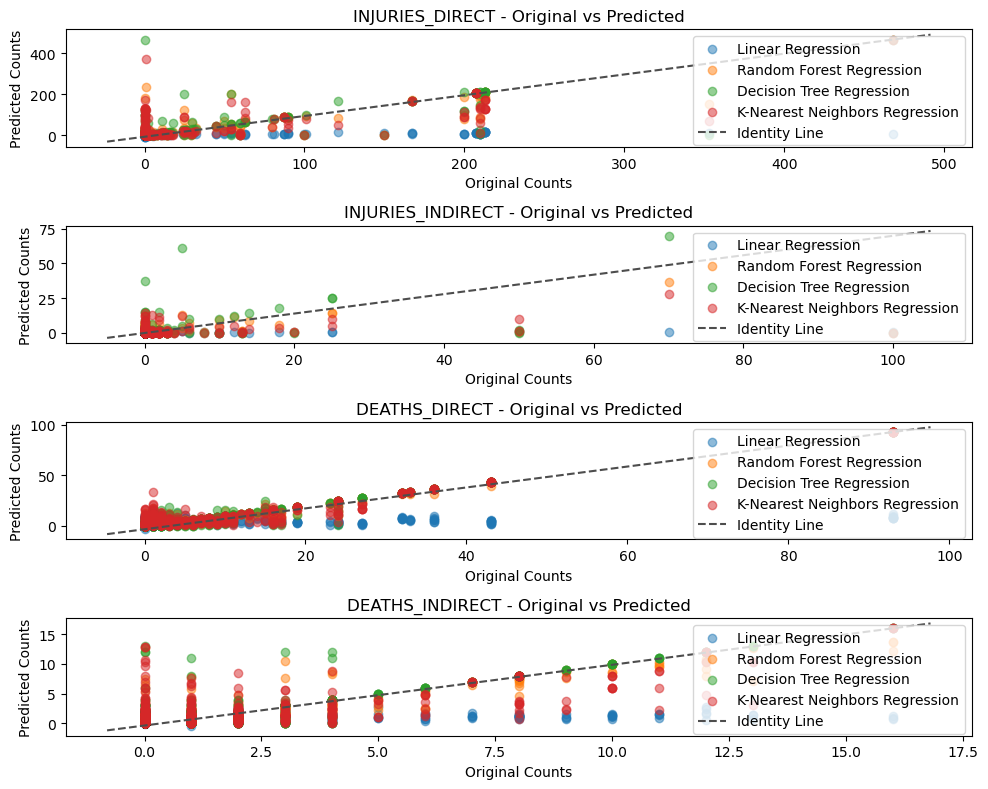

In [46]:
import matplotlib.pyplot as plt

# Define the number of subplots based on the number of target variables
num_subplots = len(target_variables)

# Create subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 8))

# Iterate over target variables
for i, target_var in enumerate(target_variables):
    ax = axes[i]
    ax.set_title(f"{target_var} - Original vs Predicted")
    
    # Plot original vs predicted values for each model
    for model_name, predictions in models.items():
        ax.scatter(y_test[target_var], predictions[:, i], label=model_name, alpha=0.5)
        
    # Plot identity line (y = x)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", label="Identity Line")
    
    ax.set_xlabel("Original Counts")
    ax.set_ylabel("Predicted Counts")
    ax.legend()

plt.tight_layout()
plt.show()
